Implementing Feedforward neural networks with Keras and TensorFlow

a. Import the necessary packages b. Load the training and testing data (MNIST/CIFAR10) c. Define the network architecture using Keras d. Train the model using SGD e. Evaluate the network f. Plot the training loss and accuracy

## a. Import the necessary packages 

In [1]:
import tensorflow as tf
#import tensorflow libary ans assigns it the alias tf

C:\Users\ASUS\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
from tensorflow import keras
#keras is an integrated high-level API for building and training neural networks as its backend

In [3]:
import matplotlib.pyplot as plt
#This allows you to create plots and graphs for data visualization

In [4]:
import random
#It is standard python library modeule for generate random numbers or perform random operations within your code.

### b. Loading the training and testing data(mnist/cifar10) 

In [5]:
mnist=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train=x_train/255
x_test=x_test/255
#It is popular dataset contains a large collection of handwritten digits,often used for training and testing image classification models
#Splitting it into training and testing data
#load_data(): loads both the training and testing datasets.


### c.Define the network architecture using Keras  

In [6]:
model=keras.Sequential([                     #create sequential model(linear layer of stack)
    keras.layers.Flatten(input_shape=(28,28)),  #1st layer, reshape input data assumed to be 2d array with shape 28
    keras.layers.Dense(128,activation="relu"),  #fully connected layer each neuron(128) connected to every output of previous layer
    keras.layers.Dense(10,activation="softmax") #output layer softmax used in multiclass classification problem to convert raw output scores into probabilities
])

# ReLU(Rectified Linear Unit) common choice for hidden layer

In [7]:
model.summary()  #provides information about architecture of the model,including layers,no. of parameters and output shapes.
#Param= no. of trainable parameters in each layer.
#total params represents the total number of trainable parameters in the entire model.
#Trainable params is the number of parameters that are updated during training.
#Non-trainable params would include any parameters that are not updated during training, 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### d. Train the model using SGD  

In [8]:
model.compile(optimizer='sgd',
loss='sparse_categorical_crossentropy',   # sets the loss function to be used during training. 
metrics = ['accuracy']                 #specifies the metrics that should be tracked during training
)
# model.compile() is used to configure the training process for the model.
# optimizer='sgd' specifies the optimization algorithm. Here, 'sgd' stands for Stochastic Gradient Descent.

history = model.fit(x_train, y_train, validation_data = [x_test,y_test], epochs=5)
#model.fit() trains the model with the specified training data (x_train and y_train).
#epochs=5 specifies the number of times the model will go through the entire training dataset (in this case, 5 times) during training.

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.6594 - accuracy: 0.8347 - val_loss: 0.3578 - val_accuracy: 0.9018
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3403 - accuracy: 0.9054 - val_loss: 0.2932 - val_accuracy: 0.9177
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2916 - accuracy: 0.9187 - val_loss: 0.2655 - val_accuracy: 0.9250
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2612 - accuracy: 0.9269 - val_loss: 0.2394 - val_accuracy: 0.9343
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2386 - accuracy: 0.9332 - val_loss: 0.2221 - val_accuracy: 0.9375


### e. Evaluate the network 

313/313 [==============================] - 1s 3ms/step - loss: 0.2221 - accuracy: 0.9375
Loss0.222
Accuracy0.938


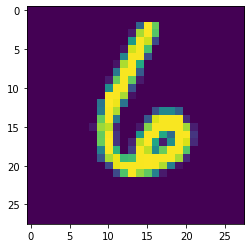

313/313 [==============================] - 1s 2ms/step


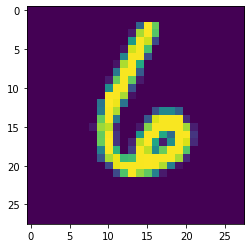

In [9]:
test_loss , test_acc = model.evaluate(x_test,y_test)
print("Loss%.3f" %test_loss)  #These lines print the test loss and test accuracy to the console with three decimal places of precision.
print("Accuracy%.3f" %test_acc)

n = random.randint(0,9999) #used to select a random test image for visualization and prediction.
plt.imshow(x_test[n])
plt.show()
predicted_value = model.predict(x_test) #ses the trained model to make predictions on the entire test dataset x_test
plt.imshow(x_test[n]) 
plt.show()

###  f. Plot the training loss and accuracy 

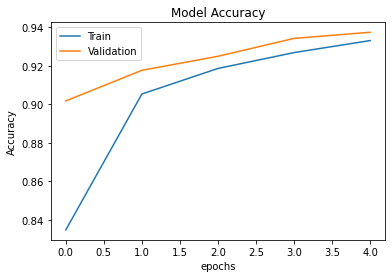

In [10]:
plt.plot(history.history['accuracy'])  #plot the training accuracy
plt.plot(history.history['val_accuracy']) #validation accuracy
plt.title("Model Accuracy")
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

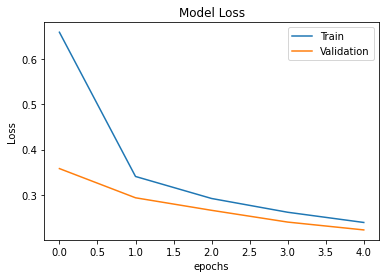

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.ylabel('Loss')
plt.xlabel('epochs')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()